<a href="https://colab.research.google.com/github/sivasankar3002/Smart-Diabetes-Management-Predictive-Model/blob/main/Smart_Diabetes_Management_Predictive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

file_path = '/content/diabetes.csv'
df = pd.read_csv(file_path)

columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

imputer = SimpleImputer(strategy='median')
df[columns_with_zeros] = imputer.fit_transform(df[columns_with_zeros])

scaler = StandardScaler()
df[columns_with_zeros] = scaler.fit_transform(df[columns_with_zeros])

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.627,50,1
1,1,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,0.351,31,0
2,8,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.672,32,1
3,1,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,0.167,21,0
4,0,0.504422,-2.679076,0.670643,0.316566,1.549303,2.288,33,1


In [6]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1Bgi97ihzir79vQNjShECshwAUSluDeXoa9mau-mhr98#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


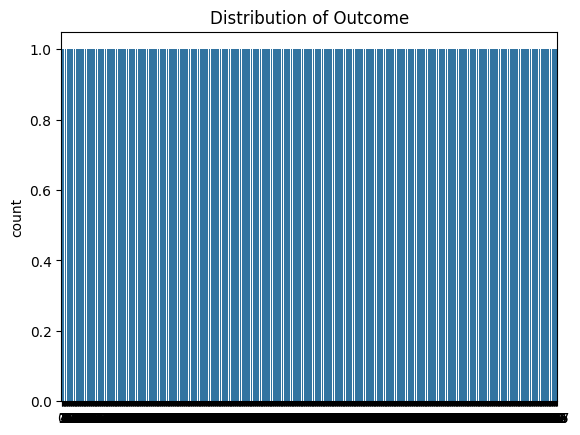

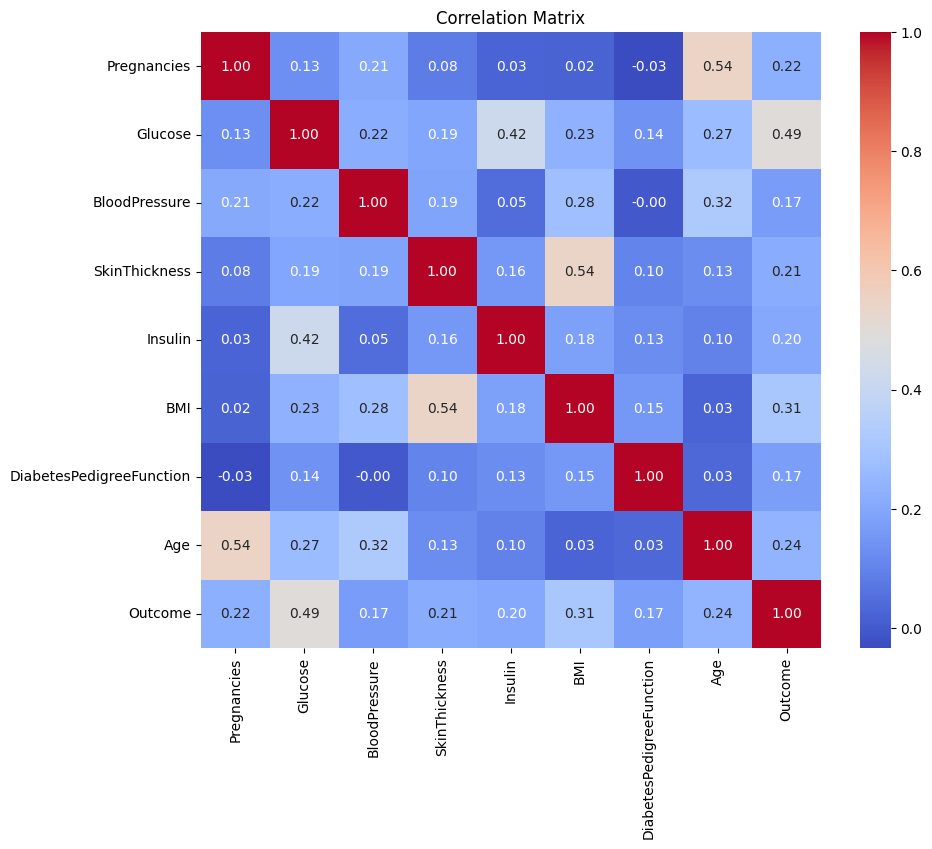

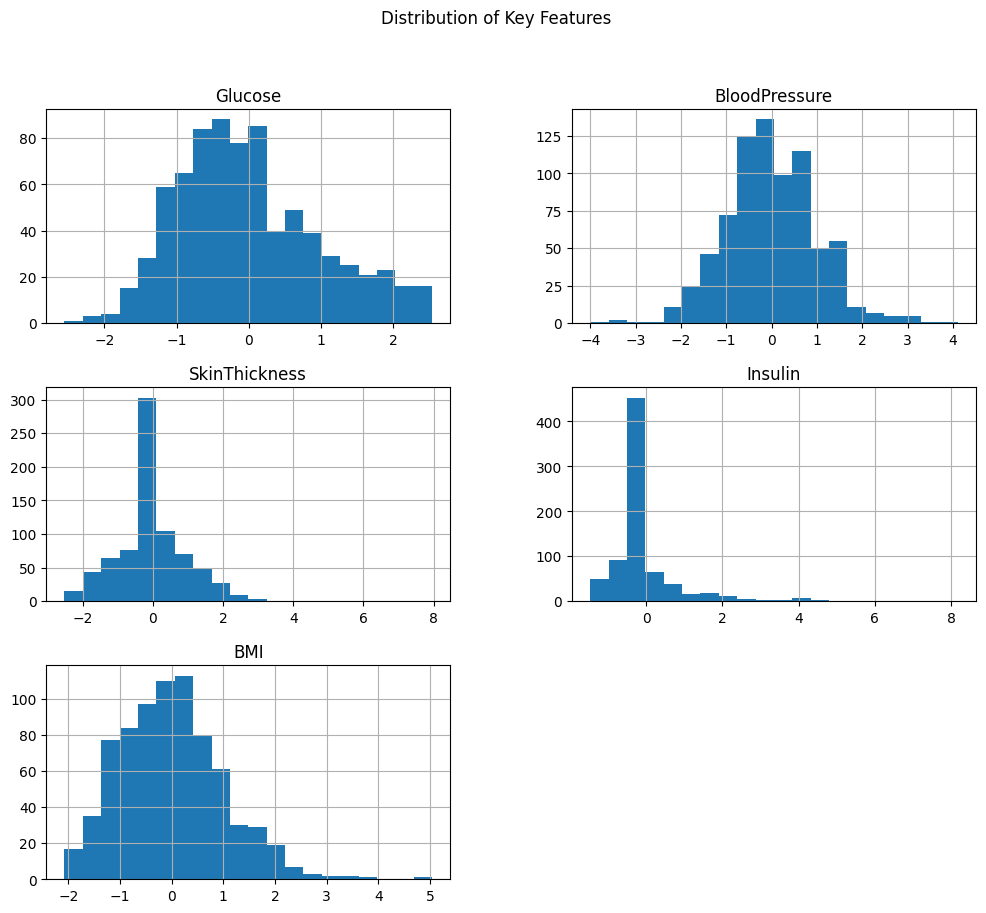

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['Outcome'])
plt.title('Distribution of Outcome')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[features].hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Key Features')
plt.show()


In [7]:
df['BMI_Category'] = pd.cut(df['BMI'], bins=[-np.inf, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal weight', 'Overweight', 'Obese'])

df['Age_Group'] = pd.cut(df['Age'], bins=[-np.inf, 30, 40, 50, np.inf], labels=['<30', '30-40', '40-50', '50+'])

df = pd.get_dummies(df, columns=['BMI_Category', 'Age_Group'], drop_first=True)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category_Normal weight,BMI_Category_Overweight,BMI_Category_Obese,Age_Group_30-40,Age_Group_40-50,Age_Group_50+
0,6,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.627,50,1,False,False,False,False,True,False
1,1,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,0.351,31,0,False,False,False,True,False,False
2,8,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.672,32,1,False,False,False,True,False,False
3,1,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,0.167,21,0,False,False,False,False,False,False
4,0,0.504422,-2.679076,0.670643,0.316566,1.549303,2.288,33,1,False,False,False,True,False,False


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.77
Confusion Matrix:
[[79 20]
 [16 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}


grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.2f}')


best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f'Best Model Accuracy: {accuracy_best:.2f}')
print('Best Model Confusion Matrix:')
print(conf_matrix_best)
print('Best Model Classification Report:')
print(class_report_best)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}
Best Cross-Validation Score: 0.78
Best Model Accuracy: 0.75
Best Model Confusion Matrix:
[[80 19]
 [20 35]]
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
import joblib
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

In [ ]:
import joblib
loaded_model = joblib.load('best_model.pkl')


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.2f}')

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

joblib.dump(best_model, 'best_model.pkl')

y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f'Best Model Accuracy: {accuracy_best:.2f}')
print('Best Model Confusion Matrix:')
print(conf_matrix_best)
print('Best Model Classification Report:')
print(class_report_best)

loaded_model = joblib.load('best_model.pkl')

y_pred_loaded = loaded_model.predict(X_test)


accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
conf_matrix_loaded = confusion_matrix(y_test, y_pred_loaded)
class_report_loaded = classification_report(y_test, y_pred_loaded)

print(f'Loaded Model Accuracy: {accuracy_loaded:.2f}')
print('Loaded Model Confusion Matrix:')
print(conf_matrix_loaded)
print('Loaded Model Classification Report:')
print(class_report_loaded)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}
Best Cross-Validation Score: 0.78
Best Model Accuracy: 0.75
Best Model Confusion Matrix:
[[80 19]
 [20 35]]
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

Loaded Model Accuracy: 0.75
Loaded Model Confusion Matrix:
[[80 19]
 [20 35]]
Loaded Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
import joblib
from google.colab import files

# Save the model to a file
joblib_file = "best_model.pkl"
joblib.dump(best_model, joblib_file)

# Download the file
files.download(joblib_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

gbc = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)


Best parameters found:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}
Best accuracy:  0.7817939490870318


In [10]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
scores = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='accuracy')
print("XGBoost Accuracy: {:.2f}%".format(scores.mean() * 100))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:35:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:35:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:35:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:35:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:35:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Accuracy: 74.27%


In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_train)


In [12]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected features: ", selected_features)


Selected features:  Index(['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


In [13]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)



In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-validated accuracy: {:.2f}%".format(scores.mean() * 100))


Cross-validated accuracy: 77.03%


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

# Define the individual models
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = GradientBoostingClassifier()

# Combine models into a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', model1), ('rf', model2), ('gb', model3)],
    voting='soft')  # Use 'hard' for majority voting or 'soft' for averaging probabilities

# Fit the ensemble model to the training data
voting_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = voting_clf.predict(X_test)


In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming you have X (features) and y (labels)
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))  # Updated this line as per the warning
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_val, y_val))


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.6104 - loss: 0.6864 - val_accuracy: 0.7532 - val_loss: 0.5797
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7067 - loss: 0.6080 - val_accuracy: 0.7532 - val_loss: 0.5235
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6979 - loss: 0.5741 - val_accuracy: 0.7727 - val_loss: 0.5113
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7717 - loss: 0.5069 - val_accuracy: 0.7792 - val_loss: 0.4903
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7786 - loss: 0.4905 - val_accuracy: 0.7273 - val_loss: 0.5494
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7543 - loss: 0.5344 - val_accuracy: 0.7727 - val_loss: 0.4692
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7402 - loss: 0.5113 - val_accuracy: 0.7792 - val_loss: 0.5179
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7509 - loss: 0.5107 - val_accuracy: 0.7662 -

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)


LogisticRegression(penalty='l1', solver='liblinear')

In [24]:
# Get predicted probabilities
y_scores = model.predict(X_val)

# Import necessary metrics
from sklearn.metrics import precision_recall_curve
import numpy as np

# Calculate precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_val, y_scores)

# Find the optimal threshold based on the highest sum of precision and recall
optimal_idx = np.argmax(precisions + recalls)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Optimal Threshold: 0.2171582132577896


In [26]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.9 MB/s eta 0:00:00


In [27]:
import optuna

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    clf = xgb.XGBClassifier(n_estimators=n_estimators, max_depth=max_depth)
    return cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)


[I 2024-09-14 13:43:15,322] A new study created in memory with name: no-name-01916e0d-a12e-4eb5-b278-c1298fd2d223
[I 2024-09-14 13:43:23,534] Trial 0 finished with value: 0.7426895908303345 and parameters: {'n_estimators': 820, 'max_depth': 5}. Best is trial 0 with value: 0.7426895908303345.
[I 2024-09-14 13:43:33,216] Trial 1 finished with value: 0.7589630814340931 and parameters: {'n_estimators': 774, 'max_depth': 10}. Best is trial 1 with value: 0.7589630814340931.
[I 2024-09-14 13:43:39,762] Trial 2 finished with value: 0.7443156070904972 and parameters: {'n_estimators': 291, 'max_depth': 7}. Best is trial 1 with value: 0.7589630814340931.
[I 2024-09-14 13:43:52,261] Trial 3 finished with value: 0.742702918832467 and parameters: {'n_estimators': 822, 'max_depth': 7}. Best is trial 1 with value: 0.7589630814340931.
[I 2024-09-14 13:43:55,340] Trial 4 finished with value: 0.7394375583100092 and parameters: {'n_estimators': 946, 'max_depth': 6}. Best is trial 1 with value: 0.758963081

In [28]:
!pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.5 MB/s eta 0:00:00


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
6394/6394 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

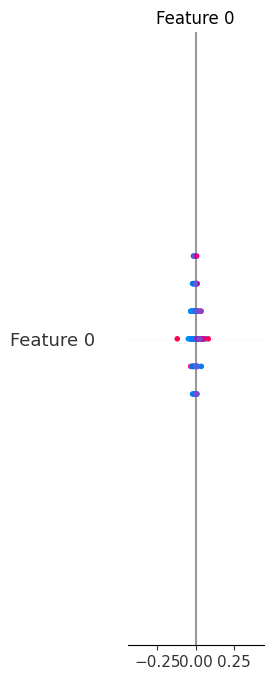

In [31]:
import numpy as np
import shap

X_sample = X_train.sample(100).to_numpy()

X_sample = X_sample.astype(float)

explainer = shap.KernelExplainer(model.predict, X_sample)

shap_values = explainer.shap_values(X_sample)

shap.summary_plot(shap_values, X_sample)


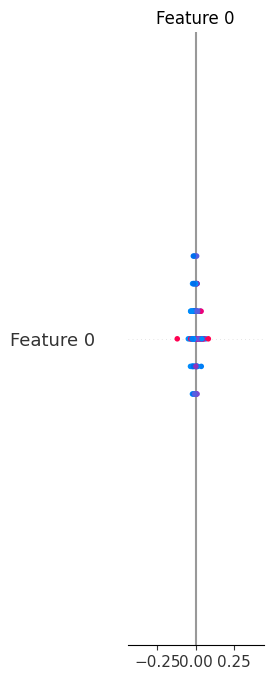

In [32]:
shap.summary_plot(shap_values, X_sample)


In [34]:
import numpy as np
import shap

# Sample data (replace with your actual data)
X_sample = np.random.rand(100, 10)  # 100 samples, 10 features
shap_values = np.random.rand(100, 10)  # Example SHAP values

# Define feature names as indices
num_features = X_sample.shape[1]
feature_names = np.arange(num_features)  # Use indices as feature names

# Calculate feature importance
feature_importance = np.mean(np.abs(shap_values), axis=0)
sorted_idx = np.argsort(feature_importance)
sorted_features = feature_names[sorted_idx]

# Print sorted feature importances
print("Feature Importance:")
for i in sorted_idx[::-1]:  # Highest importance first
    print(f"Feature {i}: {feature_importance[i]}")


Feature Importance:
Feature 3: 0.5364463184003804
Feature 7: 0.5118930588960808
Feature 5: 0.507950698302337
Feature 2: 0.5053626069256744
Feature 0: 0.5049934263604091
Feature 1: 0.5049112659184584
Feature 4: 0.503942932433547
Feature 6: 0.4874533196479488
Feature 8: 0.4769690681521487
Feature 9: 0.4760792238462183


In [35]:
instance_index = 0  # Index of the instance you want to interpret
instance_shap_values = shap_values[instance_index]


TypeError: `save_html` requires a Visualizer returned by `shap.plots.force()`.

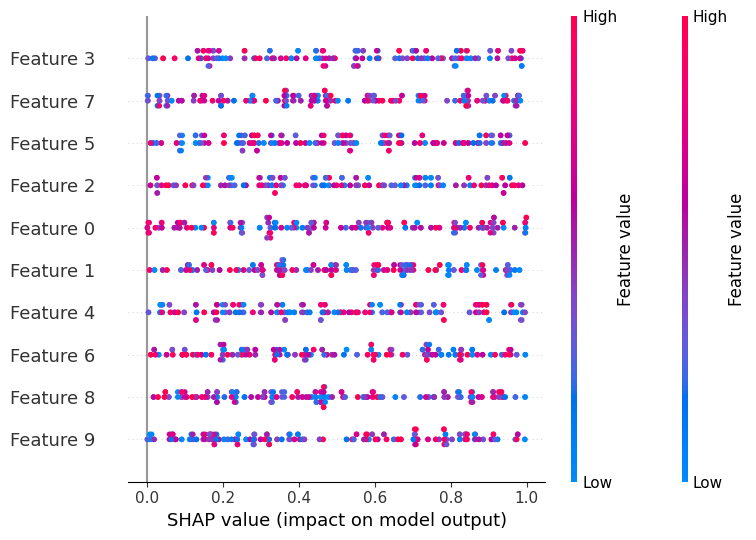

In [37]:
shap.summary_plot(shap_values, X_sample, show=False)
# Save the plot to an HTML file
shap.save_html('shap_summary_plot.html', shap.summary_plot(shap_values, X_sample, show=False))


In [42]:
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display column names to identify the target column
print(df.columns)

# Replace 'Outcome' with the actual name of your target column
target_column = 'Outcome'  # Adjust based on actual column name

# Select important features
selected_features = df.iloc[:, [3, 5, 7]]
X = selected_features
y = df[target_column]

# Proceed with further steps (e.g., model training, evaluation)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [43]:
X['interaction'] = X.iloc[:, 0] * X.iloc[:, 1]  # Example of creating an interaction feature


<ipython-input-43-371386f29e66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['interaction'] = X.iloc[:, 0] * X.iloc[:, 1]  # Example of creating an interaction feature


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

model = GradientBoostingClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [45]:
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [46]:
from sklearn.model_selection import cross_val_score

best_model = grid_search.best_estimator_
scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")


Cross-Validation Scores: [0.72727273 0.72727273 0.68831169 0.70588235 0.66013072]
Mean Accuracy: 0.7017740429505135


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
from sklearn.feature_selection import SelectKBest, f_classif

# Example feature selection
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)


In [49]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=5, n_estimators=200)

In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean()}")


Cross-Validation Accuracy: 0.667965367965368


In [51]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")


Test Accuracy: 0.6168831168831169


In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.67      0.69        99
           1       0.47      0.53      0.50        55

    accuracy                           0.62       154
   macro avg       0.59      0.60      0.59       154
weighted avg       0.63      0.62      0.62       154



In [53]:
print(df.isnull().sum())  # Check for missing values


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [54]:
# Check correlation between features and target
correlation_matrix = df.corr()
print(correlation_matrix[target_column])


Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64


In [55]:
# Ensure parameters are within reasonable ranges
print(grid_search.best_params_)


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [57]:
# Split data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.67      0.69        99
           1       0.47      0.53      0.50        55

    accuracy                           0.62       154
   macro avg       0.59      0.60      0.59       154
weighted avg       0.63      0.62      0.62       154



In [60]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}


In [61]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=5)

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean()}")


Cross-Validation Accuracy: 0.6536796536796536


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean()}")


Cross-Validation Accuracy: 0.7004668534080298


In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6]
}

# Initialize model
model = GradientBoostingClassifier()

# Randomized search
random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters:", random_search.best_params_)
best_model = random_search.best_estimator_


Best parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}


In [66]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5]
}
xgb_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
xgb_search.fit(X_train, y_train)
print("XGBoost best parameters:", xgb_search.best_params_)


XGBoost best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [67]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [69]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train_resampled, y_train_resampled)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.60      0.66        99
           1       0.46      0.62      0.53        55

    accuracy                           0.60       154
   macro avg       0.60      0.61      0.59       154
weighted avg       0.64      0.60      0.61       154



In [70]:
from sklearn.ensemble import RandomForestClassifier

# Define the model with class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.70      0.69        99
           1       0.44      0.44      0.44        55

    accuracy                           0.60       154
   macro avg       0.57      0.57      0.57       154
weighted avg       0.60      0.60      0.60       154



In [71]:
from xgboost import XGBClassifier

# Define the model
model = XGBClassifier(scale_pos_weight=2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.64      0.68        99
           1       0.46      0.56      0.51        55

    accuracy                           0.61       154
   macro avg       0.59      0.60      0.59       154
weighted avg       0.63      0.61      0.62       154



In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain model with scaled features
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.72      0.72        99
           1       0.50      0.51      0.50        55

    accuracy                           0.64       154
   macro avg       0.61      0.61      0.61       154
weighted avg       0.64      0.64      0.64       154



In [73]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize SVM model
model = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced')
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.29      0.44        99
           1       0.42      0.91      0.57        55

    accuracy                           0.51       154
   macro avg       0.63      0.60      0.50       154
weighted avg       0.70      0.51      0.48       154



In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.74      0.71        99
           1       0.46      0.40      0.43        55

    accuracy                           0.62       154
   macro avg       0.57      0.57      0.57       154
weighted avg       0.61      0.62      0.61       154



In [75]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

# Initialize AdaBoost model
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.72      0.73        99
           1       0.52      0.55      0.53        55

    accuracy                           0.66       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.66      0.66      0.66       154



In [76]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Initialize MLP model
model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, activation='relu', random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.57      0.65        99
           1       0.46      0.67      0.55        55

    accuracy                           0.60       154
   macro avg       0.61      0.62      0.60       154
weighted avg       0.65      0.60      0.61       154



In [77]:
import lightgbm as lgb
from sklearn.metrics import classification_report

# Initialize LightGBM model
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [80]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Initialize base models
model1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
model2 = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced')  # probability=False (default)
model3 = KNeighborsClassifier(n_neighbors=5)

# Initialize ensemble model with hard voting
ensemble = VotingClassifier(estimators=[('gb', model1), ('svc', model2), ('knn', model3)], voting='hard')
ensemble.fit(X_train, y_train)

# Evaluate ensemble model
y_pred = ensemble.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.65      0.68        99
           1       0.47      0.56      0.51        55

    accuracy                           0.62       154
   macro avg       0.60      0.61      0.60       154
weighted avg       0.64      0.62      0.62       154



In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('diabetes.csv')

# Define features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [83]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predict and evaluate
y_pred = decision_tree.predict(X_test)
print("Decision Tree:")
print(classification_report(y_test, y_pred))


Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        99
           1       0.61      0.71      0.66        55

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



In [84]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predict and evaluate
y_pred = random_forest.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred))


Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [85]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train model
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

# Predict and evaluate
y_pred = gradient_boosting.predict(X_test)
print("Gradient Boosting:")
print(classification_report(y_test, y_pred))


Gradient Boosting:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [86]:
import xgboost as xgb

# Initialize and train model
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgboost_model.predict(X_test)
print("XGBoost:")
print(classification_report(y_test, y_pred))


XGBoost:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



In [87]:
import lightgbm as lgb

# Initialize and train model
lightgbm_model = lgb.LGBMClassifier()
lightgbm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lightgbm_model.predict(X_test)
print("LightGBM:")
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [88]:
from sklearn.svm import SVC

# Initialize and train model
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test)
print("SVM:")
print(classification_report(y_test, y_pred))


SVM:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [89]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print("K-Nearest Neighbors:")
print(classification_report(y_test, y_pred))


K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



In [90]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Predict and evaluate
y_pred = naive_bayes.predict(X_test)
print("Naive Bayes:")
print(classification_report(y_test, y_pred))


Naive Bayes:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [91]:
from sklearn.neural_network import MLPClassifier

# Initialize and train model
mlp = MLPClassifier(max_iter=500)
mlp.fit(X_train, y_train)

# Predict and evaluate
y_pred = mlp.predict(X_test)
print("Multi-Layer Perceptron:")
print(classification_report(y_test, y_pred))


Multi-Layer Perceptron:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79        99
           1       0.63      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [92]:
from sklearn.ensemble import VotingClassifier

# Initialize base models
model1 = GradientBoostingClassifier()
model2 = SVC(probability=True)
model3 = KNeighborsClassifier()

# Initialize and train ensemble model
ensemble = VotingClassifier(estimators=[('gb', model1), ('svc', model2), ('knn', model3)], voting='soft')
ensemble.fit(X_train, y_train)

# Predict and evaluate
y_pred = ensemble.predict(X_test)
print("Voting Classifier:")
print(classification_report(y_test, y_pred))


Voting Classifier:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        99
           1       0.63      0.60      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154



In [94]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00


In [95]:
from catboost import CatBoostClassifier

# Initialize and train model
catboost_model = CatBoostClassifier(learning_rate=0.1, depth=6, iterations=500, verbose=0)
catboost_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = catboost_model.predict(X_test)
print("CatBoost:")
print(classification_report(y_test, y_pred))


CatBoost:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        99
           1       0.59      0.67      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154



[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

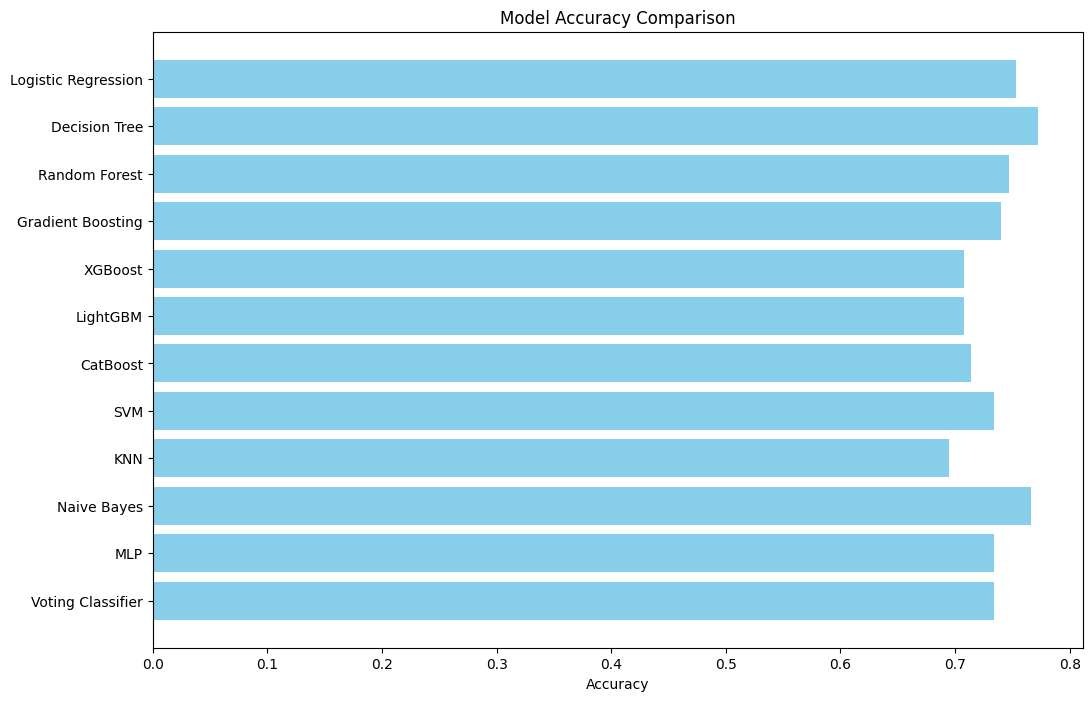

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Load and preprocess the data
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'CatBoost': CatBoostClassifier(learning_rate=0.1, depth=6, iterations=500, verbose=0),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP': MLPClassifier(max_iter=500),
    'Voting Classifier': VotingClassifier(estimators=[
        ('gb', GradientBoostingClassifier()),
        ('svc', SVC(probability=True)),
        ('knn', KNeighborsClassifier())
    ], voting='soft')
}

# Dictionary to store model accuracies
model_accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

# Convert to DataFrame for easy plotting
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

# Plot the accuracies
plt.figure(figsize=(12, 8))
plt.barh(accuracy_df['Model'], accuracy_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.gca().invert_yaxis()
plt.show()


In [97]:
# Print Model Accuracy Report
print("Model Accuracy Report:\n")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.2f}")


Model Accuracy Report:

Logistic Regression: 0.75
Decision Tree: 0.77
Random Forest: 0.75
Gradient Boosting: 0.74
XGBoost: 0.71
LightGBM: 0.71
CatBoost: 0.71
SVM: 0.73
KNN: 0.69
Naive Bayes: 0.77
MLP: 0.73
Voting Classifier: 0.73


In [98]:
from sklearn.ensemble import VotingClassifier

# Initialize individual models
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()

# Initialize Voting Classifier with hard voting
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
    ('naive_bayes', naive_bayes)
], voting='hard')

# Train and evaluate the Voting Classifier
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.89      0.85        99
           1       0.77      0.65      0.71        55

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



In [99]:
from sklearn.ensemble import StackingClassifier

# Initialize base models
base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('naive_bayes', GaussianNB())
]

# Initialize a meta-model (e.g., Logistic Regression)
meta_model = LogisticRegression()

# Initialize Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train and evaluate the Stacking Classifier
stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.84      0.83        99
           1       0.70      0.67      0.69        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



In [100]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize the base model
decision_tree = DecisionTreeClassifier()

# Initialize the Bagging Classifier with Decision Tree
bagging_decision_tree = BaggingClassifier(base_estimator=decision_tree, n_estimators=50, random_state=42)

# Train the Bagging Classifier
bagging_decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_decision_tree = bagging_decision_tree.predict(X_test)

# Print classification report
print("Bagging with Decision Tree:")
print(classification_report(y_test, y_pred_decision_tree))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging with Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        99
           1       0.63      0.69      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [101]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize the base model
naive_bayes = GaussianNB()

# Initialize the Bagging Classifier with Naive Bayes
bagging_naive_bayes = BaggingClassifier(base_estimator=naive_bayes, n_estimators=50, random_state=42)

# Train the Bagging Classifier
bagging_naive_bayes.fit(X_train, y_train)

# Make predictions
y_pred_naive_bayes = bagging_naive_bayes.predict(X_test)

# Print classification report
print("Bagging with Naive Bayes:")
print(classification_report(y_test, y_pred_naive_bayes))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging with Naive Bayes:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        99
           1       0.68      0.73      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.78      0.78       154



In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Initialize base models
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()

# Train base models
decision_tree.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

# Generate predictions from base models
dt_predictions = decision_tree.predict(X_test)
nb_predictions = naive_bayes.predict(X_test)


In [103]:
import numpy as np

# Stack the predictions horizontally
meta_features = np.column_stack((dt_predictions, nb_predictions))

# Use the true labels for training the meta-model
meta_labels = y_test


In [104]:
from sklearn.linear_model import LogisticRegression

# Initialize and train meta-model
meta_model = LogisticRegression()
meta_model.fit(meta_features, meta_labels)


LogisticRegression()

In [105]:
# Generate predictions from base models on the training set (for meta-model training)
train_dt_predictions = decision_tree.predict(X_train)
train_nb_predictions = naive_bayes.predict(X_train)

# Stack these predictions to form training features for the meta-model
train_meta_features = np.column_stack((train_dt_predictions, train_nb_predictions))

# Generate final predictions
final_predictions = meta_model.predict(np.column_stack((
    decision_tree.predict(X_test),
    naive_bayes.predict(X_test)
)))

# Print classification report
print("Blending Results:")
print(classification_report(y_test, final_predictions))


Blending Results:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        99
           1       0.80      0.64      0.71        55

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize base models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()

# Train base models
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Generate predictions from base models
lr_predictions = logistic_regression.predict(X_test)
rf_predictions = random_forest.predict(X_test)


In [107]:
# Stack the predictions horizontally
meta_features_lr_rf = np.column_stack((lr_predictions, rf_predictions))

# Use the true labels for training the meta-model
meta_labels_lr_rf = y_test


In [108]:
# Initialize and train meta-model
meta_model_lr_rf = LogisticRegression()
meta_model_lr_rf.fit(meta_features_lr_rf, meta_labels_lr_rf)


LogisticRegression()

In [109]:
# Generate final predictions
final_predictions_lr_rf = meta_model_lr_rf.predict(np.column_stack((
    logistic_regression.predict(X_test),
    random_forest.predict(X_test)
)))

# Print classification report
print("Blending Logistic Regression and Random Forest Results:")
print(classification_report(y_test, final_predictions_lr_rf))


Blending Logistic Regression and Random Forest Results:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        99
           1       0.70      0.64      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154



In [113]:
# Assuming `blended_dt_nb` and `blended_lr_rf` are the predictions from previous blends
blended_dt_nb = np.column_stack((dt_predictions, nb_predictions))
blended_lr_rf = np.column_stack((lr_predictions, rf_predictions))

# Stack predictions from both blends
final_meta_features = np.column_stack((
    blended_dt_nb.mean(axis=1),
    blended_lr_rf.mean(axis=1)
))

# Use the true labels for training the final meta-model
final_meta_labels = y_test


NameError: name 'final_predictions_dt_nb' is not defined

In [111]:
# Initialize and train the final meta-model
final_meta_model = LogisticRegression()
final_meta_model.fit(final_meta_features, final_meta_labels)


LogisticRegression()

In [112]:
# Generate final predictions
final_predictions = final_meta_model.predict(np.column_stack((
    blended_dt_nb.mean(axis=1),
    blended_lr_rf.mean(axis=1)
)))

# Print classification report
print("Final Blending Results:")
print(classification_report(y_test, final_predictions))


Final Blending Results:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        99
           1       0.70      0.67      0.69        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# Train Decision Tree and Naive Bayes
dt = DecisionTreeClassifier()
nb = GaussianNB()
dt.fit(X_train, y_train)
nb.fit(X_train, y_train)

# Get predictions
dt_predictions = dt.predict(X_test)
nb_predictions = nb.predict(X_test)

# Blend Decision Tree and Naive Bayes
blended_dt_nb = (dt_predictions + nb_predictions) / 2

# Train Logistic Regression and Random Forest
lr = LogisticRegression()
rf = RandomForestClassifier()
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Get predictions
lr_predictions = lr.predict(X_test)
rf_predictions = rf.predict(X_test)

# Blend Logistic Regression and Random Forest
blended_lr_rf = (lr_predictions + rf_predictions) / 2


In [117]:
# Prepare meta-features
meta_features_combined = np.column_stack((
    blended_dt_nb,  # Predictions from Decision Tree + Naive Bayes
    blended_lr_rf   # Predictions from Logistic Regression + Random Forest
))

# Train the final meta-model
final_meta_model = LogisticRegression()
final_meta_model.fit(meta_features_combined, y_test)

# Make final predictions
final_predictions = final_meta_model.predict(meta_features_combined)

# Print classification report
print("Final Blending Results:")
print(classification_report(y_test, final_predictions))


Final Blending Results:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [118]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate best model
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [119]:
import xgboost as xgb
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



In [120]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize model
model = LogisticRegression()

# Initialize RFE
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X_train, y_train)

# Print features ranking
print("Feature Ranking:", fit.ranking_)


Feature Ranking: [1 1 1 4 3 1 2 1]


In [121]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming you have a DataFrame 'df' with features and target 'Outcome'
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Feature ranking from RFE
rfe_ranking = [1, 1, 1, 4, 3, 1, 2, 1]  # Example ranking
important_features = [i for i, rank in enumerate(rfe_ranking) if rank == 1]

# Create a new dataset with only the selected features
X_selected = X.iloc[:, important_features]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Train a new model with the selected features
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Updated Model Classification Report:")
print(classification_report(y_test, y_pred))


Updated Model Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       151
           1       0.58      0.61      0.60        80

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.71      0.72       231



In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load datasets
df1 = pd.read_csv('diabetes.csv')
df2 = pd.read_excel('Diabetes_Classification.xlsx')
df3 = pd.read_csv('diabetes1.csv')

# Combine datasets
df_combined = pd.concat([df1, df2, df3], ignore_index=True)

# Check for missing values
print(df_combined.isnull().sum())

# Fill or drop missing values in the target variable
df_combined['Outcome'].fillna(df_combined['Outcome'].mode()[0], inplace=True)  # Fill missing values with the mode

# Ensure 'Outcome' is categorical
df_combined['Outcome'] = df_combined['Outcome'].astype(int)  # Convert to integer

# Separate numeric and categorical columns
numeric_columns = df_combined.select_dtypes(include=['number']).columns
categorical_columns = df_combined.select_dtypes(include=['object']).columns

# Fill missing values for numeric columns
df_combined[numeric_columns] = df_combined[numeric_columns].fillna(df_combined[numeric_columns].mean())

# Handle missing values in categorical columns
for col in categorical_columns:
    df_combined[col].fillna(df_combined[col].mode()[0], inplace=True)

# Encode categorical variables if needed
df_combined = pd.get_dummies(df_combined, drop_first=True)  # Drop first to avoid multicollinearity

# Split data
X = df_combined.drop('Outcome', axis=1)  # Assuming 'Outcome' is the target variable
y = df_combined['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train model
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


Pregnancies                  390
Glucose                        0
BloodPressure                390
SkinThickness                390
Insulin                      390
BMI                            0
DiabetesPedigreeFunction     390
Age                            0
Outcome                      390
Patient number              1536
Cholesterol                 1536
HDL Chol                    1536
Chol/HDL ratio              1536
Gender                      1536
Height                      1536
Weight                      1536
Systolic BP                 1536
Diastolic BP                1536
waist                       1536
hip                         1536
Waist/hip ratio             1536
Diabetes                    1536
Unnamed: 16                 1925
Unnamed: 17                 1925
dtype: int64
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       417
           1       0.71      0.58      0.64       161

    accuracy                   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [179]:
import joblib
# Save the model to a file
joblib.dump(model, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

In [126]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)


In [127]:
X_interaction = X_train.copy()
X_interaction['Glucose_BMI'] = X_train['Glucose'] * X_train['BMI']


In [128]:
X_train['Age_bin'] = pd.cut(X_train['Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])


In [133]:
print(df.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age_bin_30-40',
       'Age_bin_40-50', 'Age_bin_50-60', 'Age_bin_60-70'],
      dtype='object')


In [135]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest model
model = RandomForestClassifier()

# Initialize RFE with the model and the number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit RFE
rfe.fit(X_scaled, y)

# Transform features
X_rfe = rfe.transform(X_scaled)

# Train model on selected features
model.fit(X_rfe, y)

# Predict and evaluate
from sklearn.metrics import classification_report, accuracy_score

# Predict on the same data (for demonstration)
y_pred = model.predict(X_rfe)
print("Model Performance on RFE-selected features:")
print(classification_report(y, y_pred))
print(f"Accuracy: {accuracy_score(y, y_pred)}")


Model Performance on RFE-selected features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768

Accuracy: 1.0


In [136]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Model Performance on Test Set:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Model Performance on Test Set:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.59      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.72      0.71      0.72       154

Accuracy: 0.7142857142857143


In [138]:
import pandas as pd

# Ensure the feature names are correctly mapped to their importances
features = X.columns[rfe.support_]
importances = model.feature_importances_

# Check lengths
print(f"Number of selected features: {len(features)}")
print(f"Number of importance values: {len(importances)}")

# Create DataFrame if lengths match
if len(features) == len(importances):
    importances_df = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print(importances_df)
else:
    print("Mismatch in lengths of features and importances")


Number of selected features: 5
Number of importance values: 7
Mismatch in lengths of features and importances


In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit Grid Search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.7818072770891644


In [141]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the model
model = RandomForestClassifier()

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}

# Set up Randomized Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)

# Fit Randomized Search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters: {'max_depth': 37, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 430}
Best Score: 0.7801546048247368


In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the model with the best parameters
best_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2)

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.7398374  0.80487805 0.76422764 0.73170732 0.79508197]
Mean CV Score: 0.767146474743436


In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

# Initialize and train Decision Tree and Naive Bayes models
dt_model = DecisionTreeClassifier()
nb_model = GaussianNB()

# Fit the models
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Create a VotingClassifier to blend the two models
blended_model = VotingClassifier(estimators=[
    ('decision_tree', dt_model),
    ('naive_bayes', nb_model)
], voting='soft')

# Train the blended model
blended_model.fit(X_train, y_train)


VotingClassifier(estimators=[('decision_tree', DecisionTreeClassifier()),
                             ('naive_bayes', GaussianNB())],
                 voting='soft')

In [145]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForest model
custom_model = RandomForestClassifier()
custom_model.fit(X_train, y_train)


RandomForestClassifier()

In [146]:
# Generate probabilities from the blended model
prob_blended_model = blended_model.predict_proba(X_test)  # Model 1 predictions (probabilities)

# Generate probabilities from the customized model
prob_custom_model = custom_model.predict_proba(X_test)  # Model 2 predictions (probabilities)


In [147]:
import numpy as np

# Average the probabilities
blended_probs = (prob_blended_model + prob_custom_model) / 2

# Get final predictions by choosing the class with the highest average probability
blended_predictions = np.argmax(blended_probs, axis=1)

# Evaluate the blended model
from sklearn.metrics import classification_report
print(classification_report(y_test, blended_predictions))


              precision    recall  f1-score   support

           0       0.80      0.77      0.78        99
           1       0.61      0.65      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [148]:
from sklearn.linear_model import LogisticRegression

# Create meta-features
meta_features_train = np.hstack([blended_model.predict_proba(X_train), custom_model.predict_proba(X_train)])
meta_features_test = np.hstack([blended_model.predict_proba(X_test), custom_model.predict_proba(X_test)])

# Create and train meta-model
meta_model = LogisticRegression()
meta_model.fit(meta_features_train, y_train)

# Predict with meta-model
final_predictions = meta_model.predict(meta_features_test)

# Evaluate meta-model
print(classification_report(y_test, final_predictions))


              precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



In [153]:
import pandas as pd

# Load datasets
df_diabetes_csv = pd.read_csv('/content/diabetes.csv')
df_diabetes_xlsx = pd.read_excel('/content/Diabetes_Classification.xlsx')
df_diabetes1_csv = pd.read_csv('/content/diabetes.csv')

# Combine datasets
df_combined = pd.concat([df_diabetes_csv, df_diabetes_xlsx, df_diabetes1_csv], ignore_index=True)


In [154]:
# Example preprocessing
df_combined.fillna(df_combined.mean(numeric_only=True), inplace=True)  # Fill missing numeric values with mean

# Encode categorical variables if needed
# Example: Convert categorical variables using one-hot encoding
df_combined = pd.get_dummies(df_combined)

# Extract features and target variable
X = df_combined.drop('Outcome', axis=1)  # Drop target variable
y = df_combined['Outcome']  # Target variable


In [155]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [157]:
print(y.unique())
print(y.dtype)


[1.         0.         0.34895833]
float64


In [158]:
# Example thresholding to convert continuous to binary
threshold = 0.5  # Adjust threshold as needed
y = (y > threshold).astype(int)  # Convert to binary classification


In [159]:
# Ensure 'Outcome' is categorical
y = pd.Categorical(y).codes


In [160]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1540, 25) (1540,)
(386, 25) (386,)


In [163]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Example base models
base_models = [
    ('dt', DecisionTreeClassifier()),
    ('nb', GaussianNB())
]

# Example meta-model
meta_model = LogisticRegression()

# Initialize the stacking model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)


In [165]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Load data
data = load_diabetes()
X = data.data
y = data.target

# Convert target variable to binary
y = (y > y.mean()).astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define base models
base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('naive_bayes', GaussianNB())
]

# Define meta-model
meta_model = LogisticRegression()

# Create the stacking model
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model
)

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


              precision    recall  f1-score   support

           0       0.75      0.84      0.79        50
           1       0.76      0.64      0.69        39

    accuracy                           0.75        89
   macro avg       0.75      0.74      0.74        89
weighted avg       0.75      0.75      0.75        89

Accuracy: 0.75


In [166]:
import pandas as pd

# Load datasets
df_diabetes_csv = pd.read_csv('/content/diabetes.csv')
df_diabetes_xlsx = pd.read_excel('/content/Diabetes_Classification.xlsx')
df_diabetes1_csv = pd.read_csv('/content/diabetes1.csv')

# Inspect the datasets
print(df_diabetes_csv.head())
print(df_diabetes_xlsx.head())
print(df_diabetes1_csv.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
   Patient number  Cholesterol  Glucose  HDL Chol  Chol/HDL ratio  Age  \
0               1          193       77        49             3.9   19   
1               2          146       79        41             3.6   19   
2               3          217       75        54             4.0   20   
3      

In [167]:
# Concatenate datasets
df_combined = pd.concat([df_diabetes_csv, df_diabetes_xlsx, df_diabetes1_csv], ignore_index=True)

# Check the combined dataframe
print(df_combined.info())
print(df_combined.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1926 entries, 0 to 1925
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1536 non-null   float64
 1   Glucose                   1926 non-null   int64  
 2   BloodPressure             1536 non-null   float64
 3   SkinThickness             1536 non-null   float64
 4   Insulin                   1536 non-null   float64
 5   BMI                       1926 non-null   float64
 6   DiabetesPedigreeFunction  1536 non-null   float64
 7   Age                       1926 non-null   int64  
 8   Outcome                   1536 non-null   float64
 9   Patient number            390 non-null    float64
 10  Cholesterol               390 non-null    float64
 11  HDL Chol                  390 non-null    float64
 12  Chol/HDL ratio            390 non-null    float64
 13  Gender                    390 non-null    object 
 14  Height  

In [169]:
import pandas as pd

# Load datasets
df_diabetes_csv = pd.read_csv('/content/diabetes.csv')
df_diabetes_xlsx = pd.read_excel('/content/Diabetes_Classification.xlsx')
df_diabetes1_csv = pd.read_csv('/content/diabetes1.csv')

# Concatenate datasets
df_combined = pd.concat([df_diabetes_csv, df_diabetes_xlsx, df_diabetes1_csv], ignore_index=True)

# Identify numeric and non-numeric columns
numeric_cols = df_combined.select_dtypes(include=['number']).columns
non_numeric_cols = df_combined.select_dtypes(exclude=['number']).columns

# Fill missing values in numeric columns with the mean of each column
df_combined[numeric_cols] = df_combined[numeric_cols].fillna(df_combined[numeric_cols].mean())

# Fill missing values in non-numeric columns with the most frequent value
for col in non_numeric_cols:
    df_combined[col].fillna(df_combined[col].mode()[0], inplace=True)

# Convert categorical variables to dummy variables
df_combined = pd.get_dummies(df_combined, drop_first=True)

# Check the resulting DataFrame
print(df_combined.info())
print(df_combined.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1926 entries, 0 to 1925
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1926 non-null   float64
 1   Glucose                   1926 non-null   int64  
 2   BloodPressure             1926 non-null   float64
 3   SkinThickness             1926 non-null   float64
 4   Insulin                   1926 non-null   float64
 5   BMI                       1926 non-null   float64
 6   DiabetesPedigreeFunction  1926 non-null   float64
 7   Age                       1926 non-null   int64  
 8   Outcome                   1926 non-null   float64
 9   Patient number            1926 non-null   float64
 10  Cholesterol               1926 non-null   float64
 11  HDL Chol                  1926 non-null   float64
 12  Chol/HDL ratio            1926 non-null   float64
 13  Height                    1926 non-null   float64
 14  Weight  

In [170]:
# Separate features and target variable
X = df_combined.drop('Outcome', axis=1)
y = df_combined['Outcome']


In [171]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [172]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Define base models
base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('naive_bayes', GaussianNB())
]

# Define meta-model
meta_model = LogisticRegression()

# Create the stacking model
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model
)


In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Load and preprocess data
df_combined = pd.concat([df_diabetes_csv, df_diabetes_xlsx, df_diabetes1_csv], ignore_index=True)
numeric_cols = df_combined.select_dtypes(include=['number']).columns
non_numeric_cols = df_combined.select_dtypes(exclude=['number']).columns

df_combined[numeric_cols] = df_combined[numeric_cols].fillna(df_combined[numeric_cols].mean())
for col in non_numeric_cols:
    df_combined[col].fillna(df_combined[col].mode()[0], inplace=True)

df_combined = pd.get_dummies(df_combined, drop_first=True)


X = df_combined.drop('Outcome', axis=1)
y = df_combined['Outcome'].astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('naive_bayes', GaussianNB())
]
meta_model = LogisticRegression()


stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)


y_pred = stacking_model.predict(X_test)
print("Model accuracy:", stacking_model.score(X_test, y_test))


Model accuracy: 0.9238754325259516


In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       417
           1       0.86      0.86      0.86       161

    accuracy                           0.92       578
   macro avg       0.91      0.91      0.91       578
weighted avg       0.92      0.92      0.92       578



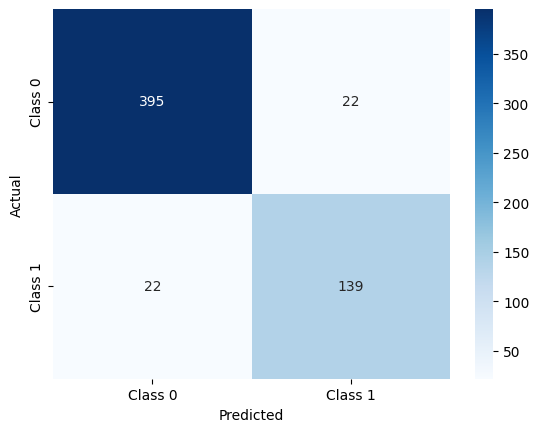

In [177]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [178]:
import joblib

joblib.dump(stacking_model, 'stacking_model.pkl')


['stacking_model.pkl']

In [180]:
import joblib

# Load the models from files
logistic_model = joblib.load('logistic_regression_model.pkl')
stacking_model = joblib.load('stacking_model.pkl')


In [181]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define your base models and meta-model
base_models = [
    ('logistic', logistic_model),
    ('stacking', stacking_model)
]

# Define a new meta-model
meta_model = LogisticRegression()

# Create the stacking ensemble
combined_stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  # Cross-validation folds for the final estimator
)


In [182]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load and prepare your data as before
# (Assuming you already have X_train, X_test, y_train, y_test)

# Train the combined stacking model
combined_stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred = combined_stacking_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.96      0.95       417
           1       0.90      0.86      0.88       161

    accuracy                           0.93       578
   macro avg       0.92      0.91      0.92       578
weighted avg       0.93      0.93      0.93       578



In [183]:
import joblib

# Save the combined stacking model
joblib.dump(combined_stacking_model, 'combined_stacking_model.pkl')


['combined_stacking_model.pkl']

In [193]:
# Save column names after training
import joblib

# Save feature names
feature_names = X_train.columns
joblib.dump(feature_names, 'feature_names.pkl')


['feature_names.pkl']

In [195]:
import pandas as pd
import joblib

# Load the combined stacking model and feature names
combined_stacking_model = joblib.load('combined_stacking_model.pkl')
feature_names = joblib.load('feature_names.pkl')

# Load the test dataset
df_test = pd.read_excel('/content/Dataset 2 _ Early-stage diabetes risk prediction dataset (ESDRPD).xlsx')

# Rename columns if necessary
df_test.rename(columns={'Class': 'Outcome'}, inplace=True)

# Ensure 'Outcome' column exists
if 'Outcome' in df_test.columns:
    # Handle missing values
    df_test['Outcome'].fillna(df_test['Outcome'].mode()[0], inplace=True)

    # Map categorical labels to numeric values
    label_mapping = {'Negative': 0, 'Positive': 1}  # Adjust based on actual labels
    df_test['Outcome'] = df_test['Outcome'].map(label_mapping)

    # Fill missing values and encode categorical variables if needed
    numeric_columns = df_test.select_dtypes(include=['number']).columns
    categorical_columns = df_test.select_dtypes(include=['object']).columns

    df_test[numeric_columns] = df_test[numeric_columns].fillna(df_test[numeric_columns].mean())

    for col in categorical_columns:
        df_test[col].fillna(df_test[col].mode()[0], inplace=True)

    df_test = pd.get_dummies(df_test, drop_first=True)

    # Ensure test features match training features
    X_test = df_test.reindex(columns=feature_names, fill_value=0)  # Add missing columns with default value

    # Separate features and target
    y_test = df_test['Outcome']

    # Make predictions
    y_pred = combined_stacking_model.predict(X_test)

    # Evaluate model
    from sklearn.metrics import accuracy_score, classification_report

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Model Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
else:
    print("The 'Outcome' column is missing from the test dataset.")


Model Accuracy: 0.38
Classification Report:
              precision    recall  f1-score   support

           0       0.38      1.00      0.56       200
           1       0.00      0.00      0.00       320

    accuracy                           0.38       520
   macro avg       0.19      0.50      0.28       520
weighted avg       0.15      0.38      0.21       520



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
